In [ ]:
import math
import pandas as pd
import numpy as np

from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import plotly.graph_objects as go


from sklearn.metrics import r2_score

In [ ]:
#Get data
data = pdr.get_data_yahoo('ITUB', start='2010-05-05', end='2023-05-05')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-05-05,8.431903,8.646624,8.287380,8.485583,4.783280,27934212
2010-05-06,8.349319,8.535134,7.577151,8.138728,4.587757,54583198
2010-05-07,8.118081,8.175891,7.672124,8.097435,4.564484,63640076
2010-05-10,8.692045,8.811793,8.592944,8.795276,4.957850,36579149
2010-05-11,8.601202,8.811793,8.514488,8.601202,4.848450,31626661
...,...,...,...,...,...,...
2023-04-28,5.090000,5.170000,5.060000,5.150000,5.145992,17423600
2023-05-01,5.110000,5.180000,5.110000,5.140000,5.136000,6168000
2023-05-02,5.120000,5.150000,4.900000,4.910000,4.910000,22896800


In [ ]:
#make a copy of data
data_copy = data

In [ ]:
df=data
df.shape

(3273, 6)

In [ ]:
#candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [ ]:
import plotly.express as px

fig = px.line(df, y='Close')

fig.update_layout(title='Line chart for Financial Data')
fig.show()

In [ ]:
fig = px.bar(df, y='Volume')

fig.update_layout(title='Bar chart for Financial Data')
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter_polar(df, r='Volume')

fig.update_layout(title='Polar chart for Financial Data')
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(df, x='Open', y='Close', color='Volume')

fig.update_layout(title='Scatter plot for Financial Data')
fig.show()

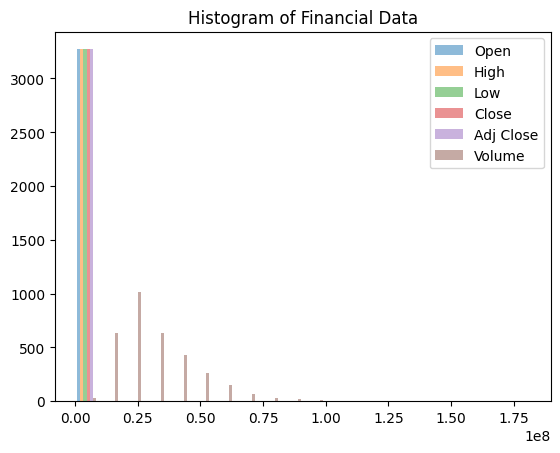

In [ ]:
# Plot combined histogram
plt.hist(data, bins=20, alpha=0.5, label=df.columns)
plt.legend(loc='upper right')
plt.title('Histogram of Financial Data')
plt.show()

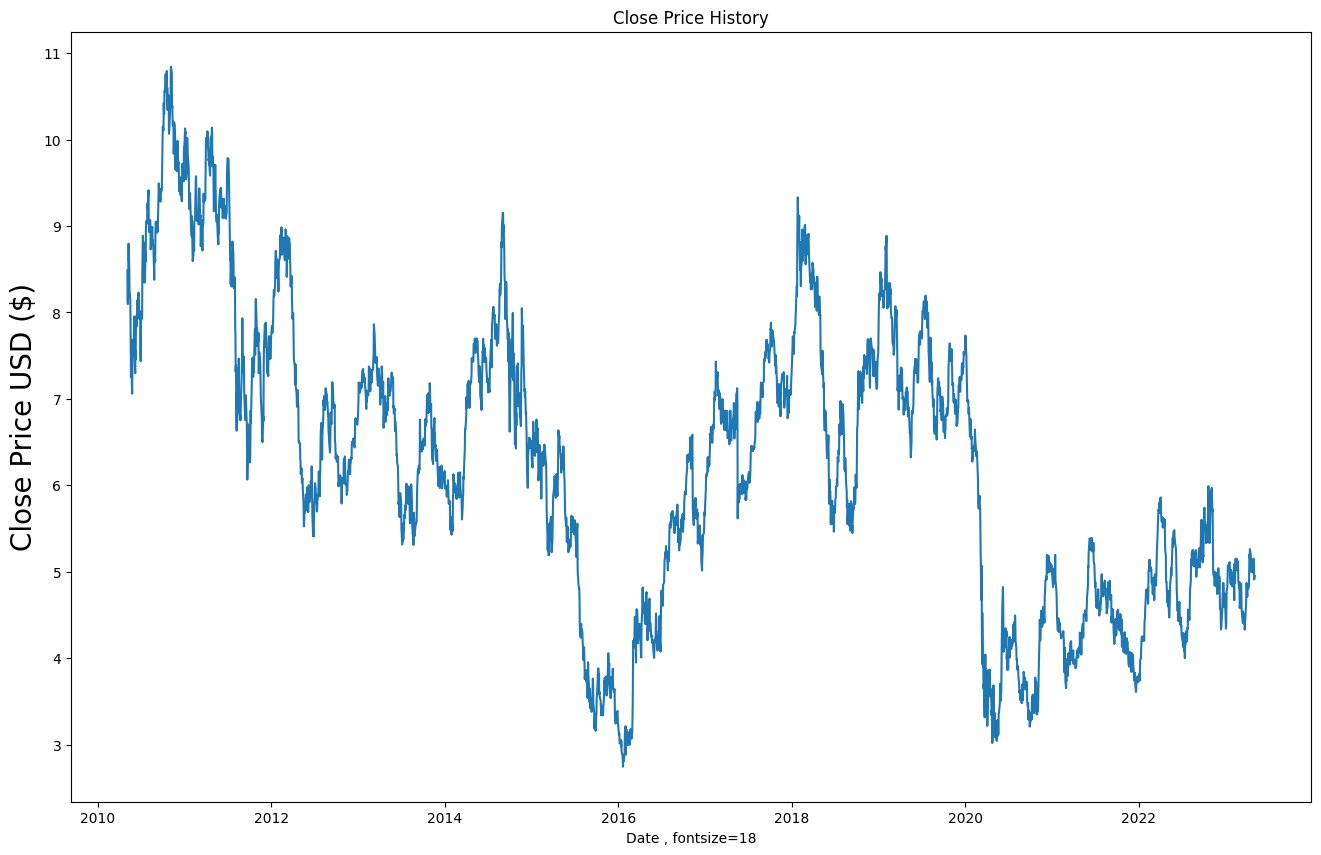

In [ ]:
#plot for Close
plt.figure(figsize=(16,10))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date , fontsize=18')
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.show()

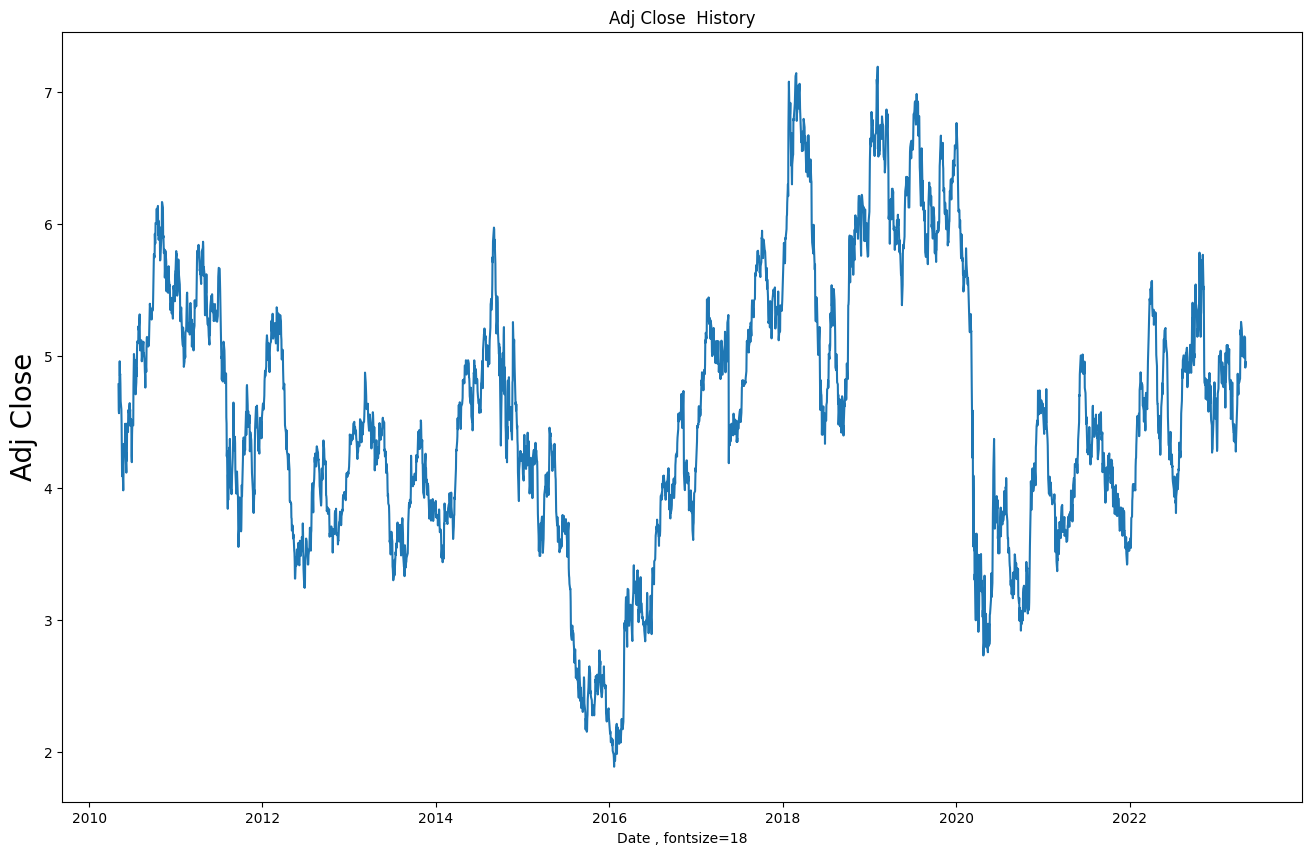

In [ ]:
#plot for Adj Close
plt.figure(figsize=(16,10))
plt.title('Adj Close  History')
plt.plot(df['Adj Close'])
plt.xlabel('Date , fontsize=18')
plt.ylabel('Adj Close', fontsize=20)
plt.show()

In [ ]:
# creat the 'Close Cloumn'
df=df.filter(['Close'])

# convert to numpy
dataset=df.values


In [ ]:
print(df)
print('-------------')
print(dataset)

               Close
Date                
2010-05-05  8.485583
2010-05-06  8.138728
2010-05-07  8.097435
2010-05-10  8.795276
2010-05-11  8.601202
...              ...
2023-04-28  5.150000
2023-05-01  5.140000
2023-05-02  4.910000
2023-05-03  4.930000
2023-05-04  4.950000

[3273 rows x 1 columns]
-------------
[[8.48558331]
 [8.13872814]
 [8.097435  ]
 ...
 [4.90999985]
 [4.92999983]
 [4.94999981]]


In [ ]:
# the number of rows to be trained
training_data_len= int(len(dataset)*.8)
training_data_len

2618

In [ ]:
# scalar
scalar=MinMaxScaler(feature_range=(0.1,1))
scaled_data=scalar.fit_transform(dataset)

print(scaled_data.shape)

(3273, 1)


In [ ]:
# creat scaled data for training
train_data=scaled_data[0:training_data_len,:]

test_data=scaled_data[training_data_len-30:,:]

In [ ]:
print(len(train_data))
print(len(test_data))

2618
685


In [ ]:
# split data to x_train , x_test
x_train=[]
y_train=[]

x_test=[] 
y_test=dataset[training_data_len:,:]

for i in range(30,len(train_data)):
  x_train.append(train_data[i-30:i,0])
  y_train.append(train_data[i,0])
  
for i in range(30,len(test_data)):
  x_test.append(test_data[i-30:i,0])
  
  


In [ ]:
#convert  the x_train , y_train , x_test  to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

x_test=np.array(x_test)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(2588, 30)
(2588,)
(655, 30)


In [ ]:
#Reshape the data

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Build the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
model=Sequential()
model.add(LSTM(80, return_sequences=True , input_shape=(x_train.shape[1],1)))
model.add(LSTM(80, return_sequences=False))
model.add(Dense(40))
model.add(Dense(1))

In [ ]:
# Compile the Model 
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
# Train the Model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2588/2588 [==============================] - 58s 21ms/step - loss: 0.0018


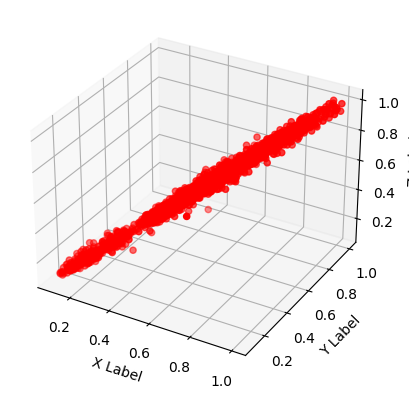

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_train[:, 0], x_train[:, 1], x_train[:, 2], c='r', marker='o')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [ ]:
# Prediction
predictions=model.predict(x_test)
predictions=scalar.inverse_transform(predictions)


21/21 [==============================] - 0s 19ms/step


In [ ]:
predictions.shape

(655, 1)

In [ ]:
y_test.shape

(655, 1)

In [ ]:
#The mean squared error
mse=np.mean(predictions-y_test)**2
mse

0.0019025497867574321

In [ ]:
# The root mean squared error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.043618227689320804

In [ ]:
#R2
r2 = r2_score(y_test, predictions)
r2

0.9280067354104882

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print("MAE: ", mae)

MAE:  0.11684949671039145


<ipython-input-67-3c7722d4ab39>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


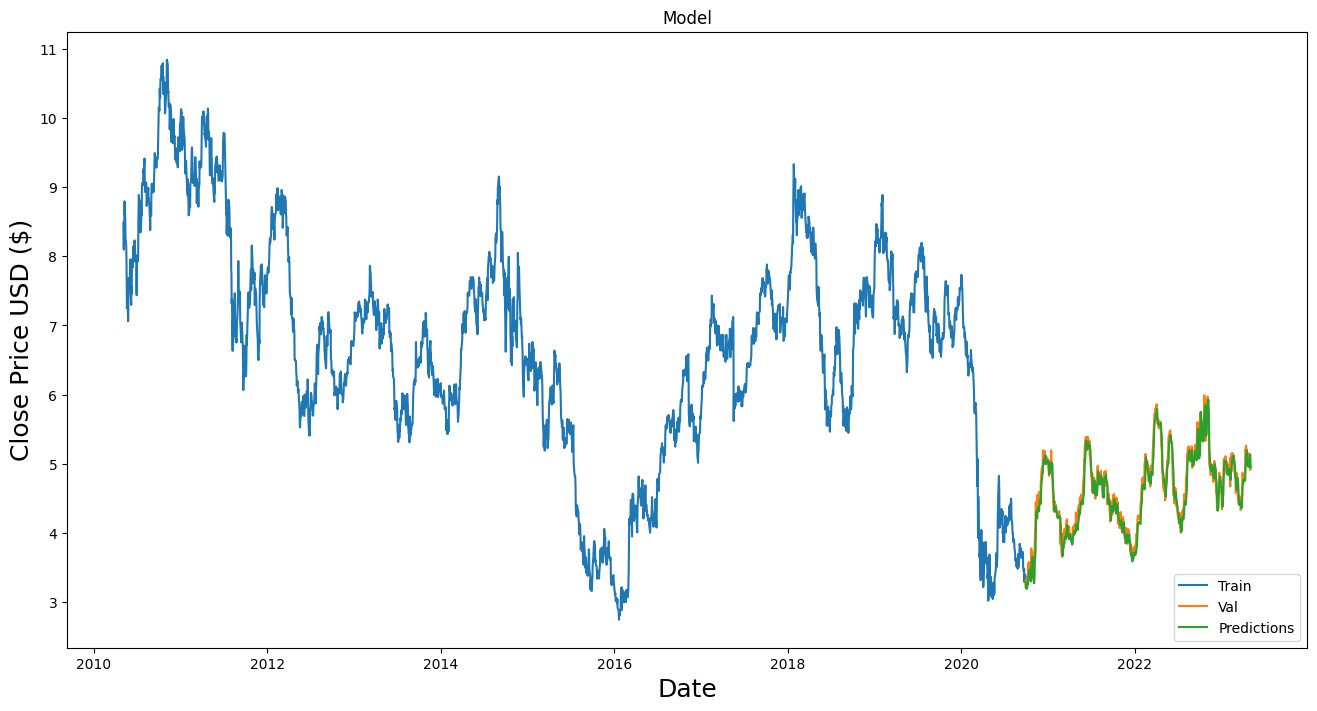

In [ ]:
#Plot the data

train=df[:training_data_len]
valid=df[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)' , fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()





In [ ]:
valid

,Close,Predictions
Date,,
2020-09-28,3.305853,3.289284
2020-09-29,3.206925,3.269846
2020-09-30,3.281121,3.213649
2020-10-01,3.256389,3.197650
2020-10-02,3.281121,3.189608
...,...,...
2023-04-28,5.150000,5.036735
2023-05-01,5.140000,5.098862
2023-05-02,4.910000,5.128091


In [ ]:
#Get the last 60 day Closing price values 
last_30_days=df[-30:]

In [ ]:
#Covert to array
last_30_days=last_30_days.values

In [ ]:
#Scalar
last_30_days_scaled=scalar.transform(last_30_days)

In [ ]:
#
X_test=[]

X_test.append(last_30_days_scaled)

In [ ]:
# Convert the numpy array

X_test=np.array(X_test)

In [ ]:
# Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


In [ ]:
#Prediction
predict=model.predict(X_test)


1/1 [==============================] - 0s 62ms/step


In [ ]:
# Get the predicted scalar price
predict_inerse=scalar.inverse_transform(predict)
predict_inerse

array([[4.9122663]], dtype=float32)

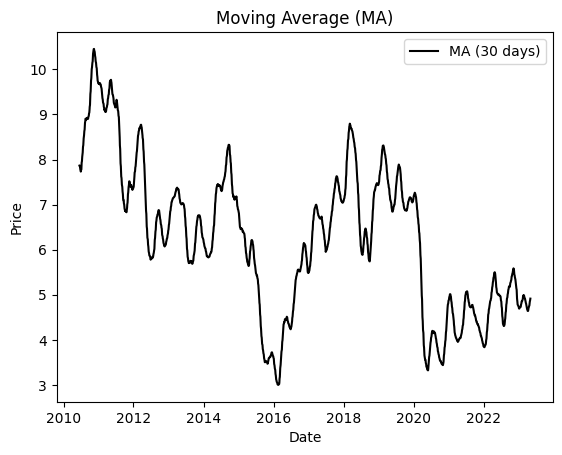

In [ ]:
ma = df['Close'].rolling(window=30).mean()

# Plot the moving average
plt.plot(df.index, ma, label='MA (30 days)', color='black')

# Add legend and title to the plot
plt.legend()
plt.title('Moving Average (MA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

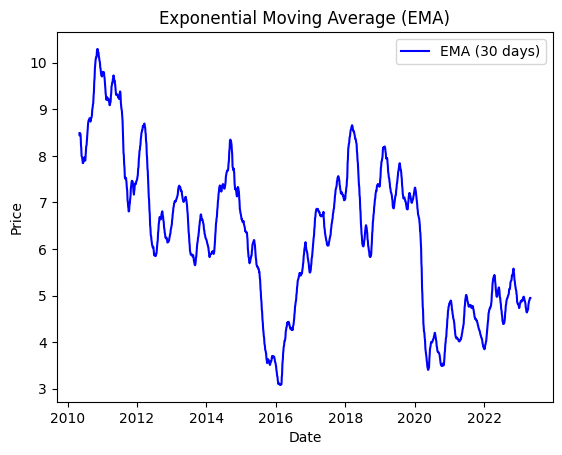

In [ ]:
import matplotlib.pyplot as plt

# Calculate the EMA
ema = df['Close'].ewm(span=30, adjust=False).mean()

# Plot the EMA
plt.plot(df.index, ema, label='EMA (30 days)', color='blue')

# Add legend and title to the plot
plt.legend()
plt.title('Exponential Moving Average (EMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# Create a function for calculation Moving Average(MA) & Exponential Moving Average(EMA)
def MA(data,period=30,column='Close'):
  return data[column].rolling(window=period).mean()

def EMA(data,period=30,column='Close'):
  return data[column].ewm(span=period).mean()
  

In [ ]:
# Create two new columns for storing the 25 day and 60 day MA
df['MA20']=MA(df,20)
df['MA50']=MA(df,50)
df['EMA20']=EMA(df,20)
df['EMA50']=EMA(df,50)

In [ ]:
# Get the buy and sell signals
#MA
df['Signal']=np.where(df['MA20']>df['MA50'],1,0)
df['Position']=df['Signal'].diff()

df['Buy']=np.where(df['Position']==1, df['Close'] , np.NAN)
df['Sell']=np.where(df['Position']==-1, df['Close'], np.NAN)


#EMA
df['Signal']=np.where(df['EMA20']>df['EMA50'],1,0)
df['Position']=df['Signal'].diff()

df['Buy']=np.where(df['Position']==1, df['Close'] , np.NAN)
df['Sell']=np.where(df['Position']==-1, df['Close'], np.NAN)


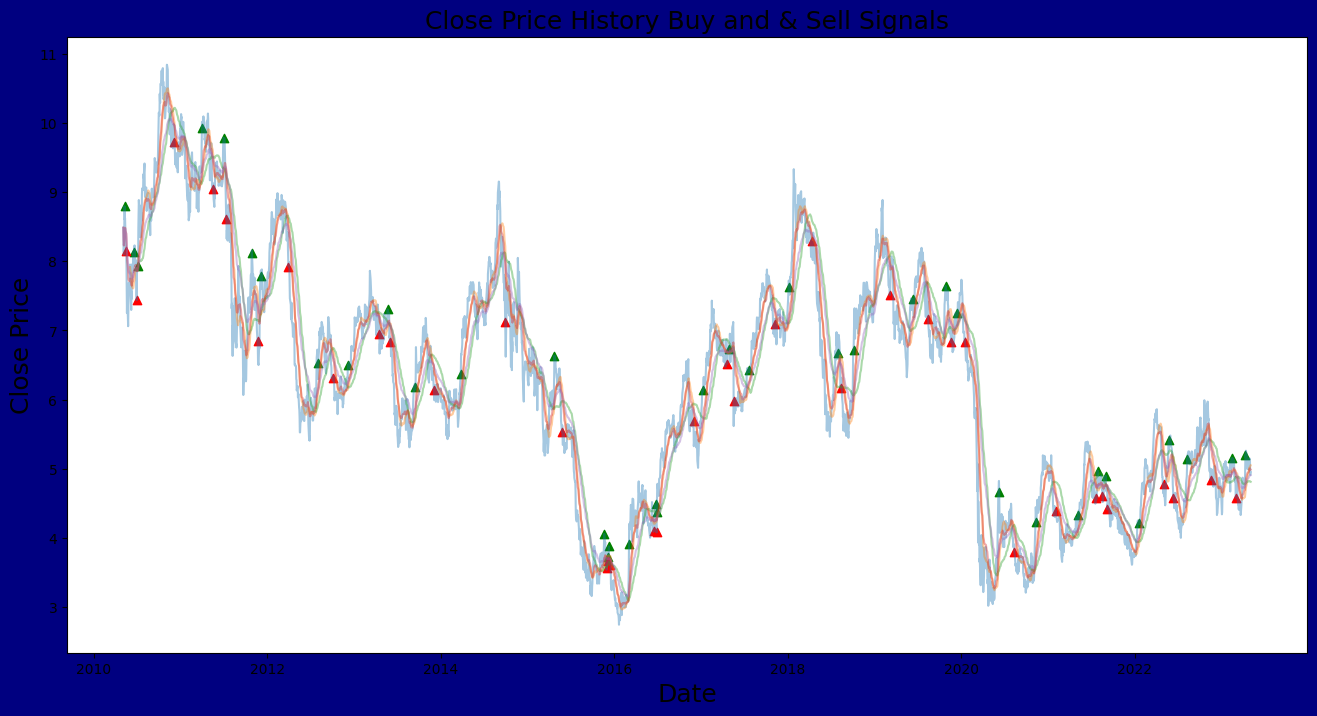

In [ ]:
#Show the Close price with the MA ,WMA,EMA and Buy and Sell signals
plt.figure(facecolor='navy',figsize=(16,8))
plt.title('Close Price History Buy and & Sell Signals' , fontsize=18)
plt.plot(df['Close'], alpha=0.4 , label='Close')
plt.plot(df['MA20'], alpha=0.4 , label='MA20')
plt.plot(df['MA50'], alpha=0.4 , label='MA50')
plt.plot(df['EMA20'], alpha=0.4 , label='EMA25')
plt.plot(df['EMA50'], alpha=0.4 , label='EMA60')


plt.scatter(df.index,df['Buy'], alpha=1, label='Buy Signal', marker='^',color='green')

plt.scatter(df.index,df['Sell'], alpha=1, label='Sell Signal', marker='^',color='red')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()